In [1]:
from bs4 import BeautifulSoup
import pandas as pd
pd.set_option('display.max_colwidth', -1)

import re
import requests

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rc
plt.rcParams.update({'font.size': 102})
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()

# Annual ridership
`http://web.mta.info/nyct/facts/ridership/ridership_sub_annual.htm`

In [2]:
response = requests.get("http://web.mta.info/nyct/facts/ridership/ridership_sub_annual.htm")
doc = BeautifulSoup(response.text)

In [3]:
stations = []
lines = ""
for row in doc.find_all("tr")[4:]:
    station = {}
    total = ""
    try:
        
        station['Station'] = row.find_all("td")[0].text.strip()        
        try: 
            for pic in row.find("td").find("div").find_all("img"):
                one = pic['alt'].split(" ")[0]
                total = one + total
                station['lines'] = total
        except:
            pass

        station['2013'] = row.find_all("td")[1].text
        station['2014'] = row.find_all("td")[2].text
        station['2015'] = row.find_all("td")[3].text
        station['2016'] = row.find_all("td")[4].text
        station['2017'] = row.find_all("td")[5].text
        station['2018'] = row.find_all("td")[6].text.strip()
        station['Rank'] = row.find_all("td")[9].text
        station['Borough'] = row.find_previous("td", colspan="10").text
        stations.append(station)
    except: pass

In [4]:
df = pd.DataFrame(stations, columns=['Station','lines','Borough','Rank','2013','2014','2015','2016','2017','2018'])
df = df.dropna()

In [5]:
## Changing the numbers to actual numbers

cols = ['2013', '2014','2015','2016','2017','2018']
df[cols] = df[cols].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',',''), errors='coerce'))
df.Rank = df.Rank.astype(int)

## Large analysis

In [6]:
df.groupby('Borough').Station.count().values

array([157, 121,  78,  68], dtype=int64)

In [7]:
def get_change(x):
    return x['2018'] - x['2017']

df['17-18 change'] = df.apply(get_change, axis=1)

## Total loss by year, boroughs condensed

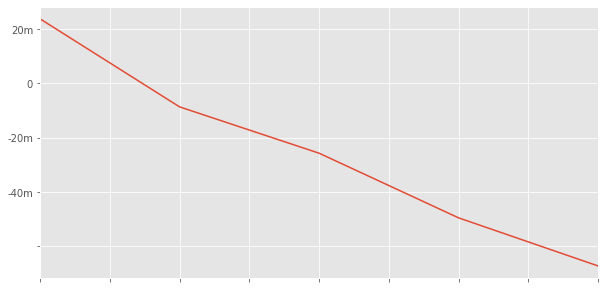

In [8]:


total={}
total['index'] = [0]
total['13-14'] = (df['2014'].sum() - df['2013'].sum())
total['14-15'] = (df['2015'].sum() - df['2014'].sum()) 
total['15-16'] = (df['2016'].sum() - df['2015'].sum())
total['16-17'] = (df['2017'].sum() - df['2016'].sum())
total['17-18'] = (df['2018'].sum() - df['2017'].sum())
total = pd.DataFrame(total)
total = total.transpose()
ax=total.tail(5).plot(legend=False, figsize=(10,5))
ax.set_yticklabels(['','','-40m','-20m','0','20m','40m'])
ax.set_xticklabels('')

plt.savefig("images/header_image.pdf")

##  Total ridership by borough

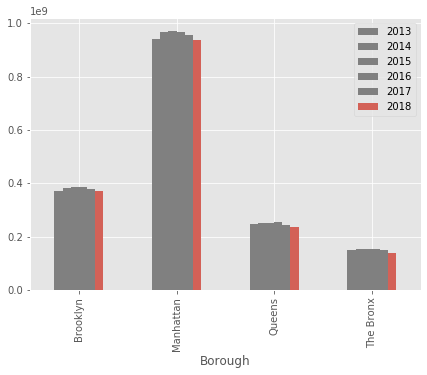

In [9]:
df.groupby('Borough').sum().plot(kind='bar', y=['2013','2014','2015','2016','2017','2018'], color=['gray','gray','gray','gray','gray','#D36157'], figsize=(7, 5))

## Average loss per station in borough


In [10]:
df2={}
df2['borough'] = ['Brooklyn','Manhattan','Queens','The Bronx']
df2['13-14'] = (df.groupby('Borough')['2014'].sum().values - df.groupby('Borough')['2013'].sum().values) / df.groupby('Borough').Station.count().values
df2['14-15'] = (df.groupby('Borough')['2015'].sum().values - df.groupby('Borough')['2014'].sum().values) / df.groupby('Borough').Station.count().values
df2['15-16'] = (df.groupby('Borough')['2016'].sum().values - df.groupby('Borough')['2015'].sum().values) / df.groupby('Borough').Station.count().values
df2['16-17'] = (df.groupby('Borough')['2017'].sum().values - df.groupby('Borough')['2016'].sum().values) / df.groupby('Borough').Station.count().values
df2['17-18'] = (df.groupby('Borough')['2018'].sum().values - df.groupby('Borough')['2017'].sum().values) / df.groupby('Borough').Station.count().values
df2 = pd.DataFrame(df2)
df2.head()
# df.groupby('Borough').Station.count().values

,borough,13-14,14-15,15-16,16-17,17-18
0,Brooklyn,65813.127389,30724.554140,-19161.643312,-32915.095541,-58224.509554
1,Manhattan,206282.165289,41565.322314,-32543.809917,-89437.438017,-157485.595041
2,Queens,63983.320513,21087.102564,5805.487179,-123941.897436,-115739.948718
3,The Bronx,49983.235294,-2833.735294,11193.397059,-56737.852941,-146792.735294


## Total loss per borough per year

In [11]:
df2={}
df2['borough'] = ['Brooklyn','Manhattan','Queens','The Bronx']
df2['13-14'] = (df.groupby('Borough')['2014'].sum().values - df.groupby('Borough')['2013'].sum().values)
df2['14-15'] = (df.groupby('Borough')['2015'].sum().values - df.groupby('Borough')['2014'].sum().values)
df2['15-16'] = (df.groupby('Borough')['2016'].sum().values - df.groupby('Borough')['2015'].sum().values)
df2['16-17'] = (df.groupby('Borough')['2017'].sum().values - df.groupby('Borough')['2016'].sum().values)
df2['17-18'] = (df.groupby('Borough')['2018'].sum().values - df.groupby('Borough')['2017'].sum().values)
df2 = pd.DataFrame(df2)
df2.head()
# df.groupby('Borough').Station.count().values

,borough,13-14,14-15,15-16,16-17,17-18
0,Brooklyn,10332661.0,4823755.0,-3008378.0,-5167670.0,-9141248.0
1,Manhattan,24960142.0,5029404.0,-3937801.0,-10821930.0,-19055757.0
2,Queens,4990699.0,1644794.0,452828.0,-9667468.0,-9027716.0
3,The Bronx,3398860.0,-192694.0,761151.0,-3858174.0,-9981906.0


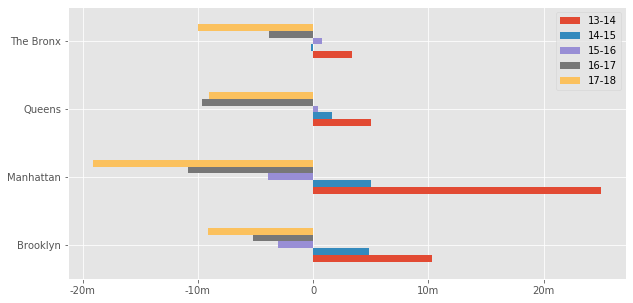

In [12]:
ax = df2.plot(kind='barh', x='borough', y=['13-14','14-15','15-16','16-17','17-18'], figsize=(10,5))
ax.set_ylabel('')
ax.set_xticklabels(['','-20m','-10m','0','10m','20m'])

plt.savefig("images/annual_ridership_by_borough_2.svg", bbox_inches='tight')

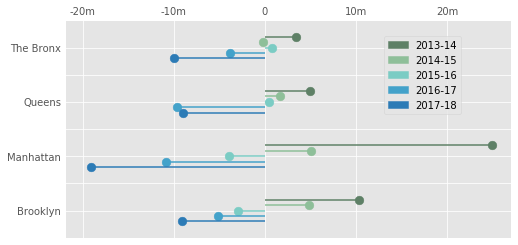

In [13]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_ylim([-1,7])
ax.set_xlim([-22000000, 27000000])
ax.xaxis.tick_top()
ax.set_yticklabels(['','Brooklyn','','Manhattan','','Queens','','The Bronx',''])
ax.set_xticklabels(['','-20m','-10m','0','10m','20m'])
# ax.set_title('Change in annual subway ridership from year to year')

ax.hlines(xmin=0, xmax=df2['13-14'], y=[(0+.4), (2+.4), (4+.4), (6+.4)], color='#5E8066')
legend = [ax.scatter(x=df2['13-14'], y=[(0+.4), (2+.4), (4+.4), (6+.4)], s=75, color='#5E8066')]

ax.hlines(xmin=0, xmax=df2['14-15'], y=[(0+.2), (2+.2), (4+.2), (6+.2)], color='#8EBF99')
legend = [ax.scatter(x=df2['14-15'], y=[(0+.2), (2+.2), (4+.2), (6+.2)], s=75, color='#8EBF99')]

ax.hlines(xmin=0, xmax=df2['15-16'], y=[(0), (2), (4), (6)], color='#7bccc4')
legend = [ax.scatter(x=df2['15-16'], y=[(0), (2), (4), (6)], s=75, color='#7bccc4')]

ax.hlines(xmin=df2['16-17'], xmax=0, y=[(0-.2), (2-.2), (4-.2), (6-.2)], color='#43a2ca')
legend = [ax.scatter(x=df2['16-17'], y=[(0-.2), (2-.2), (4-.2), (6-.2)], s=75, color='#43a2ca')]

ax.hlines(xmin=df2['17-18'], xmax=0, y=[(0-.4), (2-.4), (4-.4), (6-.4)], color='#2c7bb6')
legend = [ax.scatter(x=df2['17-18'], y=[(0-.4), (2-.4), (4-.4), (6-.4)], s=75, color='#2c7bb6')]

three_four = mpatches.Patch(color='#5E8066', label='2013-14')
four_five = mpatches.Patch(color='#8EBF99', label='2014-15')
five_six = mpatches.Patch(color='#7bccc4', label='2015-16')
six_seven = mpatches.Patch(color='#43a2ca', label='2016-17')
seven_eight = mpatches.Patch(color='#2c7bb6', label="2017-18")

ax.legend(handles=[three_four, four_five,five_six,six_seven,seven_eight], bbox_to_anchor=(.9, .95))
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.savefig("images/annual_ridership_by_borough_1.svg", bbox_inches='tight', transparent=True)

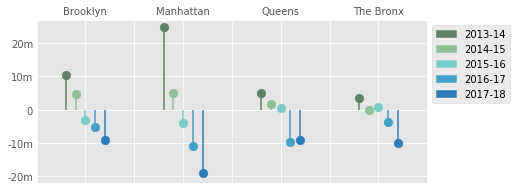

In [24]:
fig, ax = plt.subplots(figsize=(7,3))
ax.set_xlim([-1,7])
ax.set_ylim([-22000000, 27000000])
ax.xaxis.tick_top()
ax.set_xticklabels(['','Brooklyn','','Manhattan','','Queens','','The Bronx',''])
ax.set_yticklabels(['','-20m','-10m','0','10m','20m'])
# # ax.set_title('Change in annual subway ridership from year to year')

ax.vlines(ymin=0, ymax=df2['13-14'], x=[(0-.4), (2-.4), (4-.4), (6-.4)], color='#5E8066')
legend = [ax.scatter(y=df2['13-14'], x=[(0-.4), (2-.4), (4-.4), (6-.4)], s=75, color='#5E8066')]

ax.vlines(ymin=0, ymax=df2['14-15'], x=[(0-.2), (2-.2), (4-.2), (6-.2)], color='#8EBF99')
legend = [ax.scatter(y=df2['14-15'], x=[(0-.2), (2-.2), (4-.2), (6-.2)], s=75, color='#8EBF99')]

ax.vlines(ymin=0, ymax=df2['15-16'], x=[(0), (2), (4), (6)], color='#7bccc4')
legend = [ax.scatter(y=df2['15-16'], x=[(0), (2), (4), (6)], s=75, color='#7bccc4')]

ax.vlines(ymin=df2['16-17'], ymax=0, x=[(0+.2), (2+.2), (4+.2), (6+.2)], color='#43a2ca')
legend = [ax.scatter(y=df2['16-17'], x=[(0+.2), (2+.2), (4+.2), (6+.2)], s=75, color='#43a2ca')]

ax.vlines(ymin=df2['17-18'], ymax=0, x=[(0+.4), (2+.4), (4+.4), (6+.4)], color='#2c7bb6')
legend = [ax.scatter(y=df2['17-18'], x=[(0+.4), (2+.4), (4+.4), (6+.4)], s=75, color='#2c7bb6')]


three_four = mpatches.Patch(color='#5E8066', label='2013-14')
four_five = mpatches.Patch(color='#8EBF99', label='2014-15')
five_six = mpatches.Patch(color='#7bccc4', label='2015-16')
six_seven = mpatches.Patch(color='#43a2ca', label='2016-17')
seven_eight = mpatches.Patch(color='#2c7bb6', label="2017-18")

ax.legend(handles=[three_four, four_five,five_six,six_seven,seven_eight], bbox_to_anchor=(1, 1))
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.savefig("images/annual_ridership_by_borough_3.svg", bbox_inches='tight', transparent=True)

## Change in ridership from 2017-18

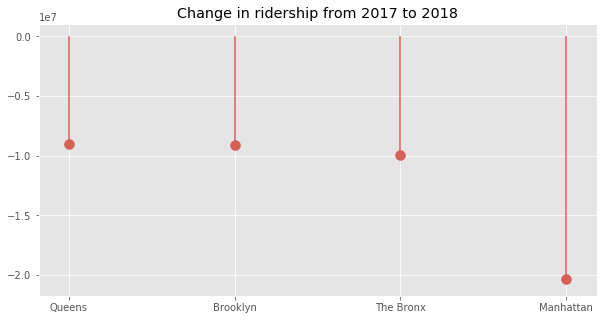

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
ax.vlines(ymin=[0], ymax=df.groupby('Borough')['17-18 change'].sum().sort_values().iloc[::-1], x=df.groupby('Borough')['2018'].sum().index, color='#d36157')
# ax.yaxis.tick_top()
ax.set_xticklabels(['Queens','Brooklyn','The Bronx','Manhattan'])
ax.set_title('Change in ridership from 2017 to 2018')
legend = [ax.scatter(y=df.groupby('Borough')['17-18 change'].sum().sort_values().iloc[::-1], x=df.groupby('Borough')['17-18 change'].sum().index, s=100, color='#d36157')]

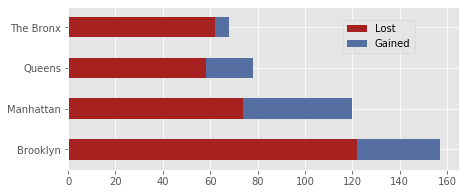

In [25]:
r = [0,1,2,3,4]
stacked_raw = {}
stacked_raw['index'] = [0, 1, 2, 3]
stacked_raw['Gained'] = (df[df['17-18 change'] > 0].groupby('Borough').Station.count())
stacked_raw['Lost'] = (df[df['17-18 change'] < 0].groupby('Borough').Station.count())
stacked = pd.DataFrame(stacked_raw)

ax = stacked.plot(kind='barh', y=['Lost','Gained'], stacked=True, color=['#a82121','#566FA3'], figsize=(7,3))
ax.legend( bbox_to_anchor=(.9, .95))
ax.set_ylabel('')
plt.savefig('images/lost_vs_gained.svg', bbox_inches='tight',transparent=True)

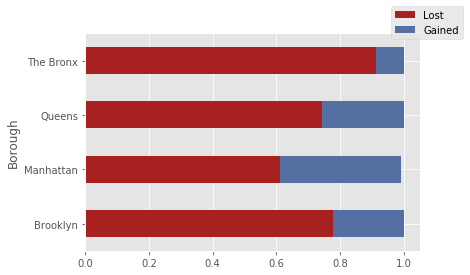

In [17]:
#### r = [0,1,2,3,4]
stacked_raw = {}
stacked_raw['index'] = [0, 1, 2, 3]
stacked_raw['Gained'] = (df[df['17-18 change'] > 0].groupby('Borough').Station.count())/df.groupby('Borough').Station.count()
stacked_raw['Lost'] = (df[df['17-18 change'] < 0].groupby('Borough').Station.count())/df.groupby('Borough').Station.count()
stacked = pd.DataFrame(stacked_raw)

stacked
ax = stacked.plot(kind='barh', y=['Lost','Gained'], stacked=True, color=['#a82121','#566FA3'])
ax.legend( bbox_to_anchor=(.9, .95))

In [35]:
df.head()

,Station,lines,Borough,Rank,2013,2014,2015,2016,2017,2018,17-18 change
0,138 St-Grand Concourse,54,The Bronx,365,957984.0,1033559.0,1056380.0,1070024.0,1036746.0,944598,-92148.0
1,149 St-Grand Concourse,542,The Bronx,121,4427399.0,4536888.0,4424754.0,4381900.0,4255015.0,3972763,-282252.0
2,161 St-Yankee Stadium,4DB,The Bronx,38,8766012.0,8961029.0,8922188.0,8784407.0,8596506.0,8392290,-204216.0
3,167 St,4,The Bronx,165,3081534.0,3067345.0,3180274.0,3179087.0,2954228.0,2933140,-21088.0
4,167 St,DB,The Bronx,231,3091289.0,3245977.0,3295032.0,3365748.0,3293451.0,2022919,-1270532.0


In [264]:
((line_one['17-18 change'] > 0).value_counts())

False    18
True     2 
Name: 17-18 change, dtype: int64

18
True     20
False    18
Name: 17-18 change, dtype: int64
43
False    43
True     6 
Name: 17-18 change, dtype: int64
24
False    24
True     10
Name: 17-18 change, dtype: int64
24
False    24
True     4 
Name: 17-18 change, dtype: int64
41
False    41
True     4 
Name: 17-18 change, dtype: int64
33
False    33
True     5 
Name: 17-18 change, dtype: int64
17
False    17
True     5 
Name: 17-18 change, dtype: int64
29
False    29
True     15
Name: 17-18 change, dtype: int64
28
False    28
True     9 
Name: 17-18 change, dtype: int64
22
False    22
True     18
Name: 17-18 change, dtype: int64
30
False    30
True     6 
Name: 17-18 change, dtype: int64
10
True     12
False    10
Name: 17-18 change, dtype: int64
37
False    37
True     8 
Name: 17-18 change, dtype: int64
13
False    13
True     8 
Name: 17-18 change, dtype: int64
28
False    28
True     2 
Name: 17-18 change, dtype: int64
22
False    22
True     2 
Name: 17-18 change, dtype: int64
24
False    24
True     12
Name: 17-18 c

C:\Users\sawye\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



13
False    13
True     9 
Name: 17-18 change, dtype: int64
18
False    18
True     2 
Name: 17-18 change, dtype: int64


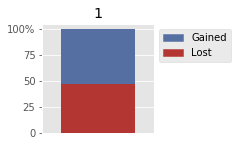

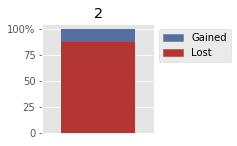

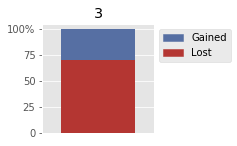

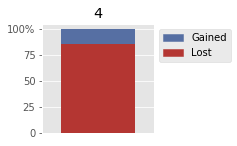

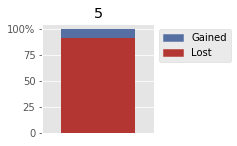

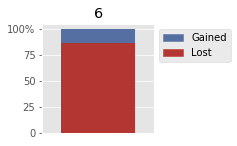

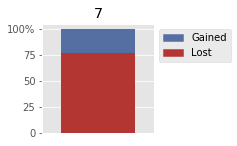

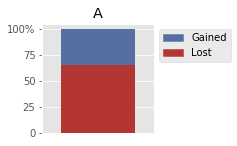

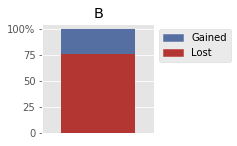

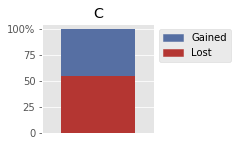

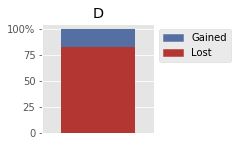

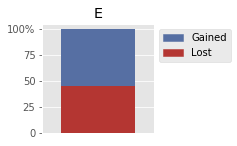

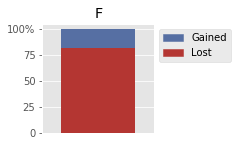

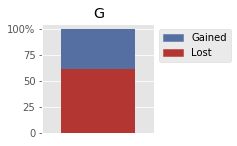

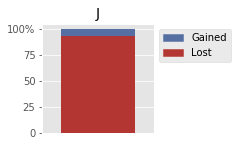

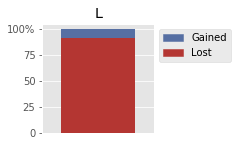

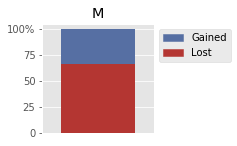

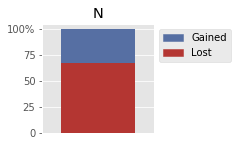

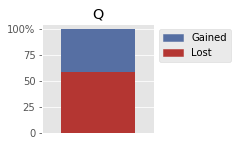

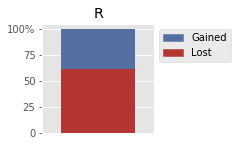

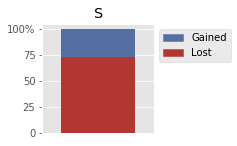

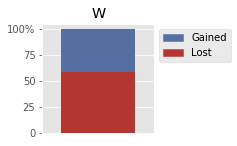

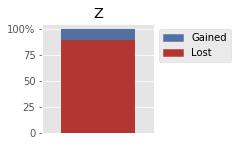

In [266]:
lines = ['1','2','3','4','5','6','7','A','B','C','D','E','F','G','J','L','M','N','Q','R','S','W','Z']

for line in lines:
    line_one = df[df.lines.str.contains(line)]
    
    count = {}
    count['index'] = [0]
    count['gained'] = ((line_one['17-18 change'] > 0).value_counts().sort_index().values[0]) / ((line_one['17-18 change'] > 0).value_counts().values.sum())
    count['lost'] = ((line_one['17-18 change'] > 0).value_counts().sort_index().values[1]) / ((line_one['17-18 change'] > 0).value_counts().values.sum())
    
    print((line_one['17-18 change'] > 0).value_counts().sort_index(ascending=True).values[0])
    print((line_one['17-18 change'] > 0).sort_index().value_counts())
    
    count = pd.DataFrame(count)
    lost = mpatches.Patch(color='#B43632', label='Lost')
    gained = mpatches.Patch(color='#566FA3', label="Gained")
    
    ax = count.plot(kind='bar', stacked=True, color=['#566FA3','#B43632'], figsize=(2,2), width=1, legend=True, title=line)
    ax.set_yticklabels(['0','25','50','75','100%'])
    ax.set_xticks([])
    ax.legend(handles=[gained, lost], bbox_to_anchor=(1, 1))
    
    plt.savefig('images/by_line/'+line+'.svg', bbox_inches='tight',transparent=True)

In [ ]:
df.to_csv("station_annual_ridership.csv", index=False)


<hr>
<hr>
<hr>

## Average weekday ridership
`http://web.mta.info/nyct/facts/ridership/ridership_sub.htm`

In [160]:
response = requests.get("http://web.mta.info/nyct/facts/ridership/ridership_sub.htm")
doc = BeautifulSoup(response.text)

In [161]:
stations = []
lines = ""
for row in doc.find_all("tr")[5:]:
    station = {}
    total = ""
    try:
        
        station['Station'] = row.find_all("td")[0].text.strip()        
        try: 
            for pic in row.find("td").find("div").find_all("img"):
                one = pic['alt'].split(" ")[0]
                total = one + total
                station['lines'] = total
        except:
            pass

        station['2013'] = row.find_all("td")[1].text
        station['2014'] = row.find_all("td")[2].text
        station['2015'] = row.find_all("td")[3].text
        station['2016'] = row.find_all("td")[4].text
        station['2017'] = row.find_all("td")[5].text
        station['2018'] = row.find_all("td")[6].text.strip()
        station['Rank'] = row.find_all("td")[9].text
        station['Borough'] = row.find_previous("td", colspan="10").text
        stations.append(station)
    except: pass

In [162]:
weekday = pd.DataFrame(stations, columns=['Station','lines','Borough','Rank','2013','2014','2015','2016','2017','2018'])
weekday = weekday.dropna()

## Changing the numbers to actual numbers
cols = ['2013', '2014','2015','2016','2017','2018']
weekday[cols] = df[cols].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',',''), errors='coerce'))
weekday.Rank = weekday.Rank.astype(int)
weekday['change'] = weekday['2018'] - weekday['2017']

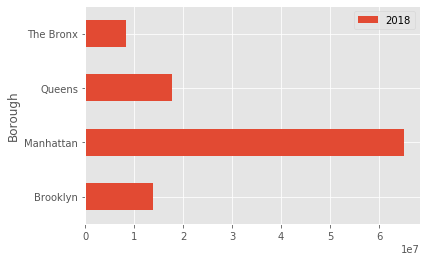

In [168]:
weekday.groupby('Borough').max().plot(kind='barh', y='2018')

In [214]:
weekday.groupby('Borough')['2018'].min()

Borough
Brooklyn     188225
Manhattan    548092
Queens       82248 
The Bronx    301240
Name: 2018, dtype: int64

In [59]:
df['change'] = df['2018'] - df['2017']

In [63]:
df.to_csv("station_weekday_ridership.csv", index=False)

## Average Weekend Ridership
`http://web.mta.info/nyct/facts/ridership/ridership_sub_weekend.htm`

In [64]:
response = requests.get("http://web.mta.info/nyct/facts/ridership/ridership_sub_weekend.htm")
doc = BeautifulSoup(response.text)

In [65]:
stations = []
lines = ""
for row in doc.find_all("tr")[5:]:
    station = {}
    total = ""
    try:
        
        station['Station'] = row.find_all("td")[0].text.strip()        
        try: 
            for pic in row.find("td").find("div").find_all("img"):
                one = pic['alt'].split(" ")[0]
                total = one + total
                station['lines'] = total
        except:
            pass

        station['2013'] = row.find_all("td")[1].text
        station['2014'] = row.find_all("td")[2].text
        station['2015'] = row.find_all("td")[3].text
        station['2016'] = row.find_all("td")[4].text
        station['2017'] = row.find_all("td")[5].text
        station['2018'] = row.find_all("td")[6].text.strip()
        station['Rank'] = row.find_all("td")[9].text
        station['Borough'] = row.find_previous("td", colspan="10").text
        stations.append(station)
    except: pass

In [66]:
df = pd.DataFrame(stations, columns=['Station','lines','Borough','Rank','2013','2014','2015','2016','2017','2018'])
df = df.dropna()

## Changing the numbers to actual numbers
cols = ['2013', '2014','2015','2016','2017','2018']
df[cols] = df[cols].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',',''), errors='coerce'))
df.Rank = df.Rank.astype(int)

In [67]:
df.tail()

,Station,lines,Borough,Rank,2013,2014,2015,2016,2017,2018
417,Sutphin Blvd-Archer Av-JFK Airport,ZJE,Queens,52,26184.0,28862.0,28383.0,28587.0,25234,24020
418,Vernon Blvd-Jackson Av,7,Queens,135,9491.0,10347.0,12582.0,14981.0,14901,11858
419,Woodhaven Blvd,ZJ,Queens,354,4255.0,5226.0,5388.0,5099.0,3884,2820
420,Woodhaven Blvd,RM,Queens,54,27194.0,27105.0,26745.0,25550.0,23929,22672
421,Woodside-61 St,7,Queens,73,20432.0,19669.0,20127.0,20360.0,21067,19796


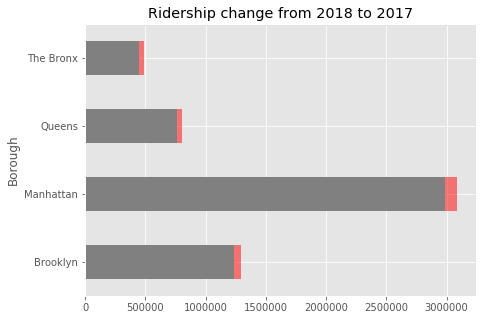

In [68]:
ax = df.groupby(by='Borough')['2017'].sum().plot(kind='barh', alpha=.5, color='red', title='Ridership change from 2018 to 2017', figsize=(7,5))
df.groupby(by='Borough')['2018'].sum().plot(kind='barh', ax=ax, color='gray')

In [69]:
df.to_csv("station_weekend_ridership.csv", index=False)